<a href="https://colab.research.google.com/github/RealB1ackY/MIREA_PyTorch/blob/main/Deep_learning_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import torch
torch.__version__ 

'1.12.1+cu113'

In [216]:
torch.cuda.is_available()

True

In [217]:
Xs = torch.tensor([[1,1], [1, 0], [0, 1], [0, 0]], dtype=torch.float32)
Xy = torch.tensor([[1], [0], [1], [0]], dtype=torch.float32)

In [218]:
from torch import nn
from torch.optim import Adam


class XORModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(),
        nn.Linear(2, 1),
        nn.Sigmoid()
    )
    self.optimizer = Adam(self.parameters())
    self.loss = nn.MSELoss()

  def forward(self, X):
    return self.layers(X)

  def fit(self, X, y_true):
    self.optimizer.zero_grad()
    y_pred = self.forward(X)
    loss = self.loss(y_true, y_pred)
    loss.backward()
    self.optimizer.step()
    return loss.item()


In [219]:
xor_model = XORModel()

In [220]:
xor_model(Xs)

tensor([[0.5516],
        [0.5560],
        [0.5386],
        [0.5424]], grad_fn=<SigmoidBackward0>)

In [221]:
EPOCHS = 100000
for i in range(EPOCHS):
  if i % 1000 == 0:
    loss = xor_model.fit(Xs, Xy)
    print(loss)

0.2543015480041504
0.25423920154571533
0.2541772723197937
0.2541157007217407
0.25405460596084595
0.2539939284324646
0.2539336681365967
0.2538738250732422
0.2538145184516907
0.2537555694580078
0.25369706749916077
0.2536390423774719
0.2535814642906189
0.2535243332386017
0.2534676194190979
0.25341135263442993
0.2533555328845978
0.25330013036727905
0.25324511528015137
0.2531905472278595
0.2531363368034363
0.2530824840068817
0.2530289888381958
0.25297582149505615
0.25292301177978516
0.25287044048309326
0.25281816720962524
0.2527661919593811
0.2527143955230713
0.25266286730766296
0.2526114881038666
0.2525603771209717
0.25250935554504395
0.25245848298072815
0.2524077594280243
0.25235715508461
0.25230666995048523
0.25225630402565
0.2522059977054596
0.2521558105945587
0.2521056532859802
0.25205564498901367
0.2520056366920471
0.25195571780204773
0.2519058883190155
0.25185608863830566
0.251806378364563
0.2517567276954651
0.25170713663101196
0.251657634973526
0.25160813331604004
0.2515587210655212

In [222]:
import torch


a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [223]:
print(a.grad)

None


In [224]:
loss = a * b + c * d
loss.backward()
     

In [225]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([4.])
tensor([2.])
tensor([5.])
None


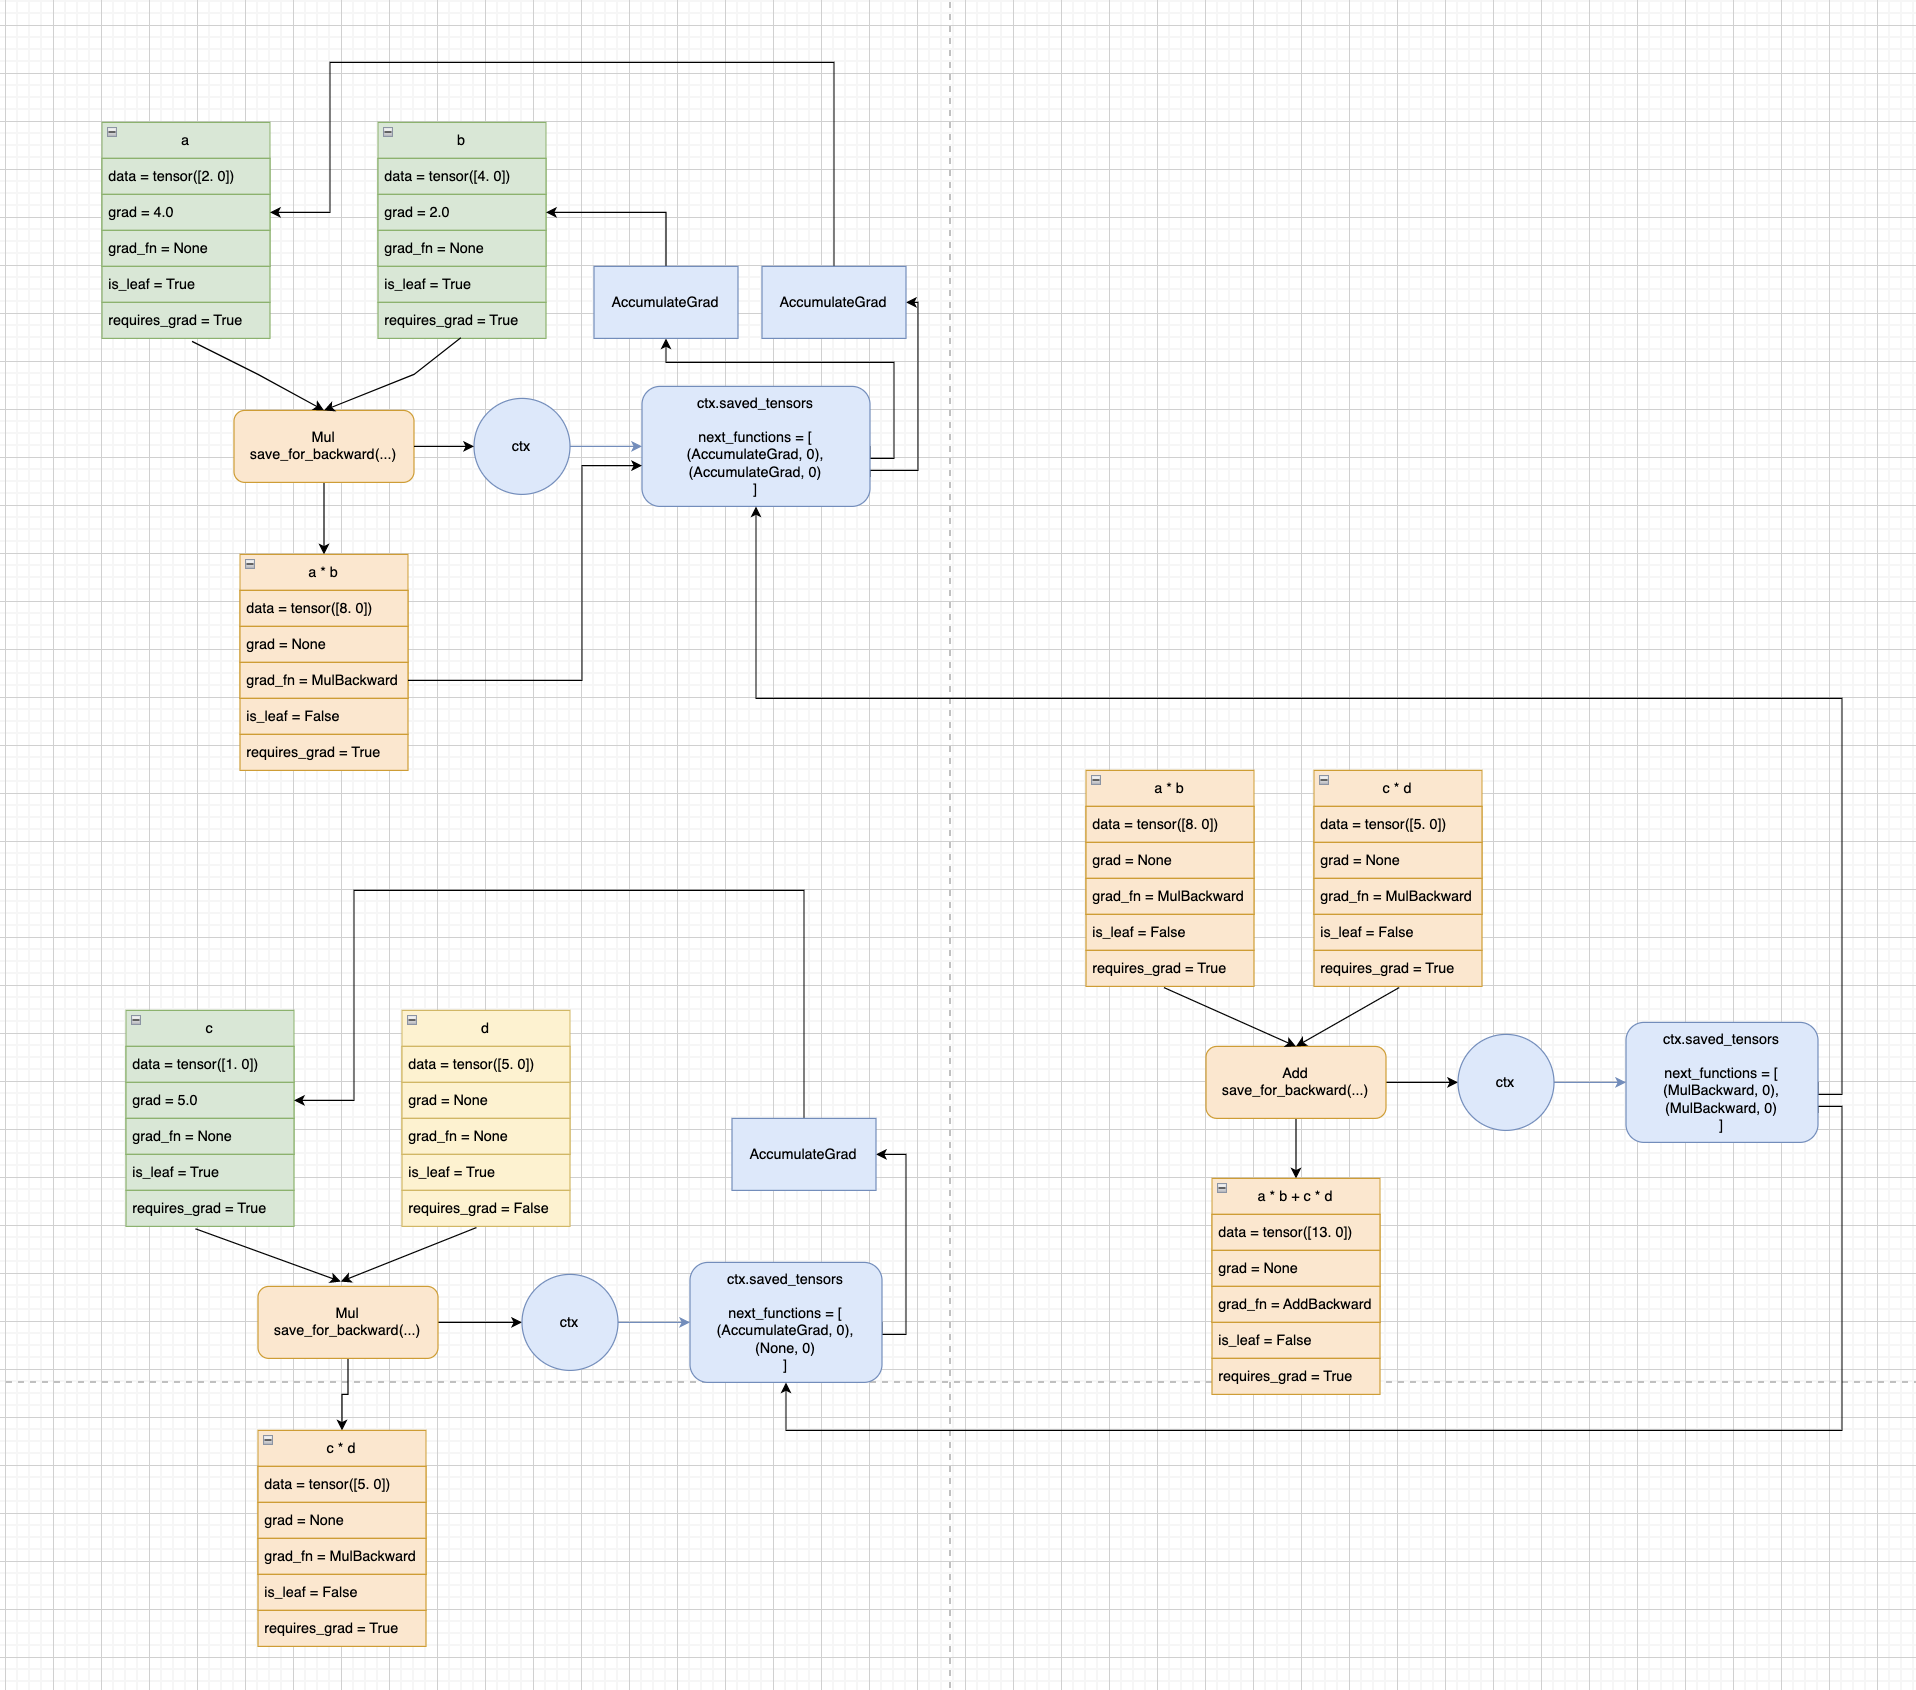